In [1]:
# Import libraries and packages
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Define path with .py codes containing functions used in this script
os.getcwd()
os.chdir( '../src/features')

# Import useful functions for this script  
from tracking import track

track("-"*25 + "CLUSTERING" + "-"*25)

# Reading data

#### Define path to data files

In [2]:
track("Defining path to data files")

# Define base path to data files
path = '../../temp_data/'

# Define path to the table that will be used in this project
path_preprocess_data = path + 'model_data.csv'

# Ensure the input file exist
assert os.path.isfile(path_preprocess_data), f'{path_preprocess_data} not found. Is it a file?'

#### Read the files

In [3]:
# Read model_data table
track("Reading files")
preprocess_data = pd.read_csv(path_preprocess_data)
track("Finished reading files")

In [4]:
# Drop the column author name    TODO
data = preprocess_data.iloc[:,2:len(preprocess_data.columns)]

# Model

In [5]:
def save_plot(fig,type_model,filename):
    '''
    Objective:
        - Save plots
    Input:
        - fig: Figure we want to save
        - type_model: K-means
        - filename: Name of the file 
    Output:
        - None
    '''  
    # Path and name of the file/figure we want to save
    path = '../../reports/figures/models'+"/"+type_model
    file_name = path+"/"+filename+".png"
    # Directory creation if doesn't exists
    try:
        os.makedirs(path)
    except OSError:
        pass
    else:
        track("Successfully created the directory %s" % path)

    # Save the figure/file
    if (os.path.exists(file_name)== True):
        track ("Warning: Figure %s already created" % path)
        track('Figure will be overwritten')
        plt.savefig(file_name, transparent=True)
    else:
        plt.savefig(file_name, transparent=True)
    track("Successfully saved %s" % path)

def normalize_data(data):
    # TODO: COMPROVAR VAR
    '''
    Objective:
        - Normalize data with the MinMaxScaler method
    Input:
        - dataset: Pandas dataframe 
    Output:
        - min_max_Scalar_df: Normalized data
    '''    
    min_max_Scalar = preprocessing.MinMaxScaler()
    col = data.columns
    result = min_max_Scalar.fit_transform(data)
    min_max_Scalar_df = pd.DataFrame(result, columns=col)
    return min_max_Scalar_df

def f_silhouette_score(dataset,total_clusters):
    '''
    Objective:
        - Compute the silhouette_score
    Input:
        - dataset: Normalized dataframe 
        - total_clusters: Maximum number of clusters
    Output:
        - Number of clusters that has the biggest value of silhouette_score
    '''       
    max_value = 0
    k = 0
    for n_cluster in range(2, total_clusters):
        kmeans = KMeans(n_clusters=n_cluster).fit(dataset)
        label = kmeans.labels_
        sil_coeff = silhouette_score(dataset, label, metric='euclidean')
        if sil_coeff > max_value:
            max_value = sil_coeff
            k = n_cluster
        track("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    print("silhouette_score", max_value)
    return k

def WCSS_and_Elbow_Method(dataset,total_k):
    '''
    Objective:
        - Compute the WCSS_and_Elbow_Method
    Input:
        - dataset: Normalized dataframe 
        - total_clusters: Maximum number of clusters
    Output:
        - Save the plot of number of clusters vs inertia
    '''        
    wcss=[]
    for i in range(1,total_k):
        # Kmeans with i clusters
        kmeans = KMeans(i)
        kmeans.fit(dataset)
        # Compute the inertia
        inertia = kmeans.inertia_        

        # Save the inertia of each iteration
        wcss.append(inertia)  

    # Plot the number of clusters vs inertia 
    number_clusters = range(1,total_k)
    fig = plt.plot(number_clusters,wcss, 'bx-')
    plt.title('WCSS and Elbow Method')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('WCSS (Elbow Method For Optimal k)')
    save_plot(fig,"K-means",'WCSS_and_Elbow_Method')


def define_num_clusters(dataset,total_k):  # TODO: AGAFAR MIN 4 CLUSTERS
    '''
    Objective:
        - Compute the optimal number of clusters with WCSS and Elbow Method and silhouette_score
    Input:
        - dataset: Normalized dataframe 
        - total_k : Maximum number of clusters to be used 
    Output:
        - The cluster number of each row
    '''
    # Compute the inertia and plot the graphic between insertia ans number of clusters
    WCSS_and_Elbow_Method(dataset,total_k)

    # Choosing the number of clusters with the silhouette_score
    number_of_clusters = f_silhouette_score(dataset,total_k)
    
    # TODO: AGAFAR MIN 4 CLUSTERS

    #Once selected the number of clusters, compute the cluster of each row and added to the dataframe
    kmeans = KMeans(number_of_clusters)
    kmeans.fit(dataset)
    identified_clusters = kmeans.fit_predict(dataset)
    iner = kmeans.inertia_
    print("total inertia", iner)  # TODO: track
    print("Number of clusters", number_of_clusters)  # TODO: track
    return (identified_clusters,number_of_clusters)

def Compute_PCA(dataset):
    '''
    Objective:
        - Compute PCA 
    Input:
        - dataset: Normalized dataframe 
    Output:
        - PCA data
    '''
    track('Performing PCA on dataset ...')
    # Take the number of components that explain more than a 0.955% of the variance  # TODO: NO CAL FER BUCLE
    for i in range(len(dataset.columns)):
        pca = PCA(n_components=i)
        principal_components = pca.fit_transform(dataset)
        if (sum(pca.explained_variance_ratio_) > 0.955):
            n = i
            track("PCA components:{}".format(n))
            break
        
    # Compute the pca with the number of components chosen
    pca = PCA(n_components=n)
    principal_components = pca.fit_transform(dataset)
    pca_df = pd.DataFrame(data = principal_components)
    track("explained variance in PCA:{}".format(sum(pca.explained_variance_ratio_)))
    print("explained variance in PCA:{}".format(sum(pca.explained_variance_ratio_)))    # borrar aquesta i al següent linea
    print("PCA components:{}".format(n))
    return pca_df


#### K-means with normalized data

In [6]:
track("Starting normalizing data")
# Normalize data
normalize_data = normalize_data(data)
track("Finished normalizing data")

silhouette_score 0.6787093724910817
total inertia 143.2709997465127
Number of clusters 2


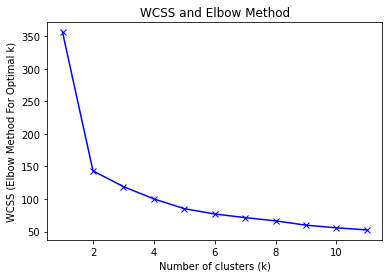

In [7]:
# Compute the number of clusters and which cluster is every author
track("Starting WCSS and Elbow method for choosing the number of clusters")
clusters, number_of_clusters = define_num_clusters(normalize_data,12)
track("Finished WCSS and Elbow method for choosing the number of clusters")

#### K-means with PCA data

In [9]:
# Compute PCA
track("Starting to compute PCA")
PCA_data = Compute_PCA(normalize_data)
track("Finished computing PCA")

explained variance in PCA:0.9557306910863511
PCA components:10


silhouette_score 0.6980355103232093
total inertia 127.5309117049738
Number of clusters 2


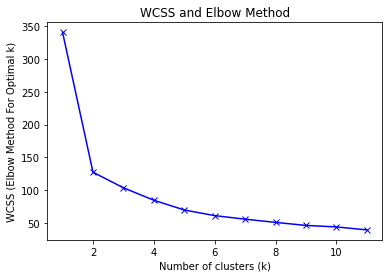

In [11]:
# Compute the number of clusters and which cluster is every author
track("Starting WCSS and Elbow method for choosing the number of clusters")
clusters, number_of_clusters = define_num_clusters(PCA_data,12)
track("Finished WCSS and Elbow method for choosing the number of clusters")